In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Data Preprocessing 

#### Load the dataset

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Select only the wanted columns

In [7]:
df = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

#### Missing value investigation

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [9]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


#### Remove Duplicates

In [10]:
df.duplicated().sum()

0

In [11]:
### Since, "PassengerId" column has unique values, we can that columns as well
df = df.reset_index()
df = df.drop(columns = ['PassengerId' , 'index'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


# EDA Analysis

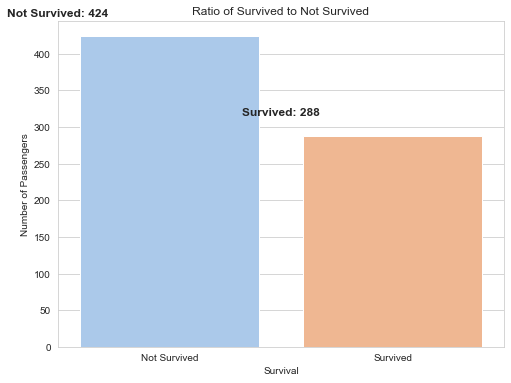

In [12]:
survived_counts = df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']

# Set up the plot and style
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
sns.set_style("whitegrid")

# Create a countplot to visualize the data
sns.countplot(data=df, x='Survived', palette='pastel')
plt.xticks(ticks=[0, 1], labels=labels)

# Add annotations to the plot
total_survived = survived_counts[1]
total_not_survived = survived_counts[0]
plt.annotate(f"Survived: {total_survived}", xy=(0.5, total_survived), xytext=(0, 20),
             ha='center', textcoords='offset points', fontsize=12, fontweight='bold')
plt.annotate(f"Not Survived: {total_not_survived}", xy=(-0.5, total_not_survived), xytext=(0, 20),
             ha='center', textcoords='offset points', fontsize=12, fontweight='bold')

# Set plot title and labels
plt.xlabel('Survival')
plt.ylabel('Number of Passengers')
plt.title('Ratio of Survived to Not Survived')

plt.show()

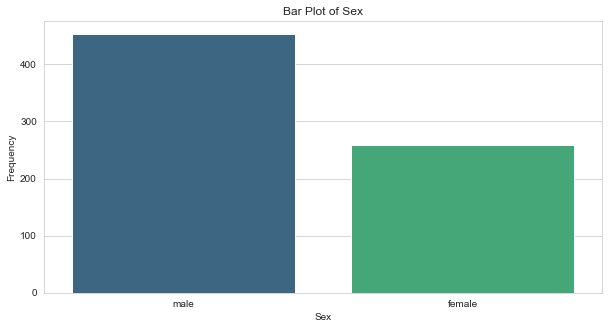

Sex:
male      453
female    259
Name: Sex, dtype: int64



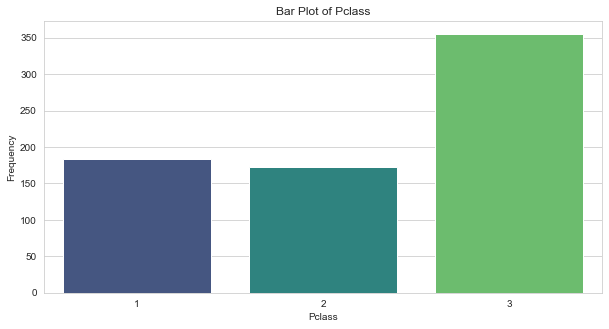

Pclass:
3    355
1    184
2    173
Name: Pclass, dtype: int64



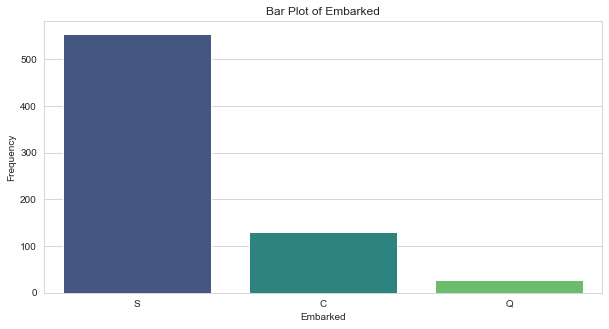

Embarked:
S    554
C    130
Q     28
Name: Embarked, dtype: int64



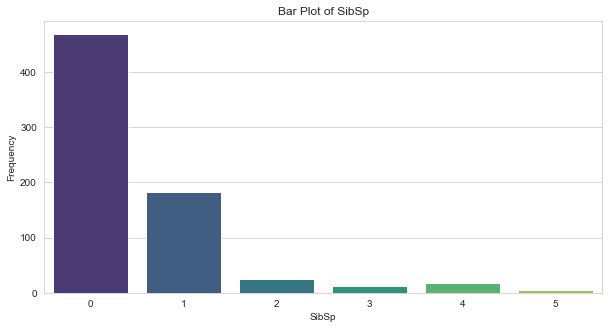

SibSp:
0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64



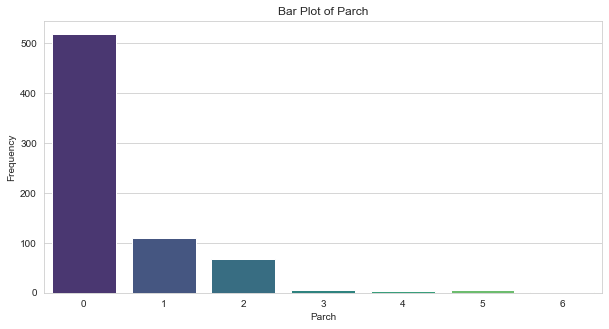

Parch:
0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64



In [13]:
def plot_categorical_bar(variable, data_frame):

    # Extract the feature from the DataFrame
    var = data_frame[variable]

    # Count the occurrences of each category in the variable
    var_value_counts = var.value_counts()

    # Create a bar plot using seaborn
    plt.figure(figsize=(10, 5))
    sns.barplot(x=var_value_counts.index, y=var_value_counts, palette="viridis")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Bar Plot of {variable}")
    plt.show()

    # Display the value counts
    print(f"{variable}:\n{var_value_counts}\n")

# Define the list of categorical variables to plot
categorical_variables = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]

# Loop through the list and plot each categorical variable
for category in categorical_variables:
    plot_categorical_bar(category, df)


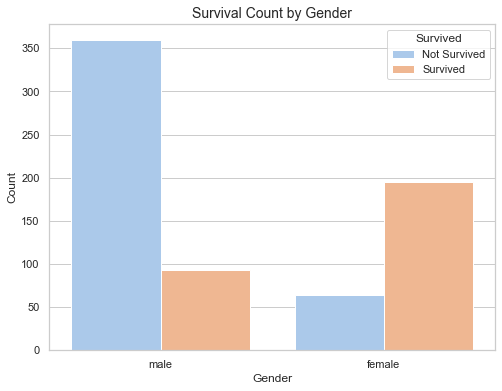

In [14]:
# Set the style for the plot (optional but enhances aesthetics)
sns.set(style='whitegrid')

# Create the countplot
plt.figure(figsize=(8, 6))  # Adjust the figure size
ax = sns.countplot(x='Sex', data=df, hue='Survived', palette='pastel')

# Add labels and title
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Survival Count by Gender', fontsize=14)

# Adding a legend with clear labels
leg_labels = ['Not Survived', 'Survived']
plt.legend(title='Survived', labels=leg_labels, loc='upper right')

# Show the plot
plt.show()

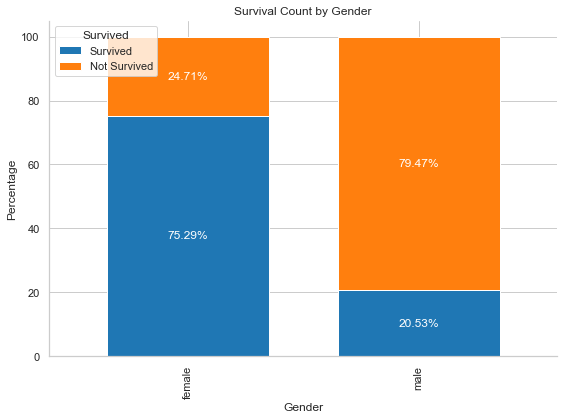

In [15]:
# Calculate the total count of passengers in each 'Pclass'
pclass_counts = df['Sex'].value_counts()

# Calculate the percentage of passengers who survived in each 'Pclass'
survived_percentage = df[df['Survived'] == 1]['Sex'].value_counts() / pclass_counts * 100

# Calculate the percentage of passengers who didn't survive in each 'Pclass'
not_survived_percentage = df[df['Survived'] == 0]['Sex'].value_counts() / pclass_counts * 100

# Create a DataFrame to hold the calculated percentages
percentage_df = pd.DataFrame({'Survived': survived_percentage, 'Not Survived': not_survived_percentage})

# Plot the bar graph with percentages
ax = percentage_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.7, figsize=(8, 6))

# Set the y-axis label to "Percentage"
ax.set_ylabel("Percentage")

# Set the plot title and x-axis label
ax.set_title("Survival Count by Gender")
ax.set_xlabel("Gender")

# Calculate the cumulative heights for annotation placement
cumulative_heights = [0] * len(percentage_df.index)
for p in ax.patches:
    percentage = f"{p.get_height():.2f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2 + cumulative_heights[int(x)]
    cumulative_heights[int(x)] += p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=12, color='white')

# Customize legend
ax.legend(title='Survived', title_fontsize=12, loc='upper left')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


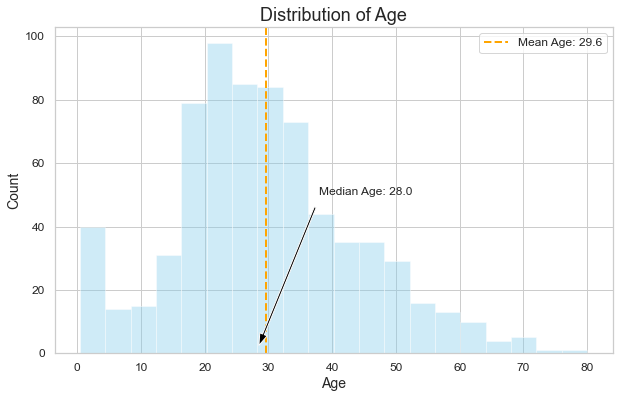

In [16]:
# Set the style for the plot
sns.set(style='whitegrid')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of age
sns.distplot(df['Age'], color='skyblue', kde=False, ax=ax)

# Add a title and labels to the axes
ax.set_title('Distribution of Age', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Customize tick labels and font size
ax.tick_params(labelsize=12)

# Add a vertical line at the mean age
mean_age = df['Age'].mean()
ax.axvline(mean_age, color='orange', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.1f}')
ax.legend(fontsize=12)

# Adding annotations (optional)
# Calculate median age
median_age = df['Age'].median()

# Annotate the median age on the plot
ax.annotate(f'Median Age: {median_age:.1f}', xy=(median_age, 0), xytext=(median_age + 10, 50),
            arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8), fontsize=12)

# Show the plot
plt.show()


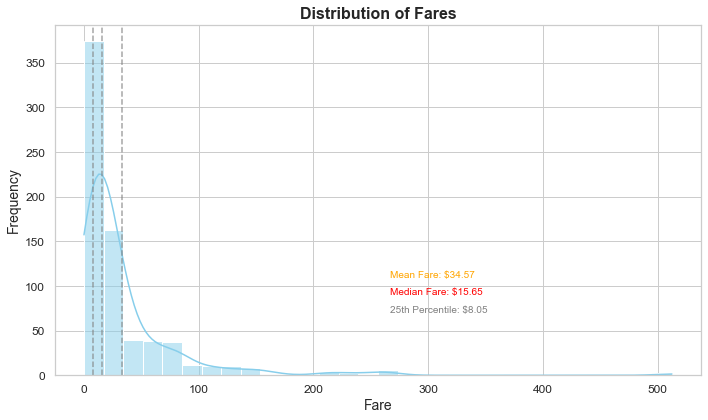

In [17]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Plot the histogram
sns.histplot(data=df, x='Fare', bins=30, kde=True, color='skyblue', edgecolor='white')

# Customize the plot
plt.title('Distribution of Fares', fontsize=16, weight='bold')
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding vertical lines for percentiles and mean/median
percentiles = [25, 50, 75]
for percentile in percentiles:
    plt.axvline(df['Fare'].quantile(percentile / 100), linestyle='dashed', color='grey', alpha=0.7)

# Adding annotations in a separate area
annotations_area_x = df['Fare'].quantile(0.99)  # To position annotations separately from the lines

# Adding mean annotation
plt.annotate(f'Mean Fare: ${df["Fare"].mean():.2f}',
             xy=(annotations_area_x, 110), xytext=(5, 0),
             textcoords='offset points', fontsize=10, color='orange')

# Adding median annotation
plt.annotate(f'Median Fare: ${df["Fare"].median():.2f}',
             xy=(annotations_area_x, 90), xytext=(5, 0),
             textcoords='offset points', fontsize=10, color='red')

# Adding percentile annotations
for percentile in percentiles:
    plt.annotate(f'{percentile}th Percentile: ${df["Fare"].quantile(percentile / 100):.2f}',
                 xy=(annotations_area_x, 70 - (percentile - 25) * 10), xytext=(5, 0),
                 textcoords='offset points', fontsize=10, color='grey')

# Show the plot
plt.tight_layout()
plt.show()


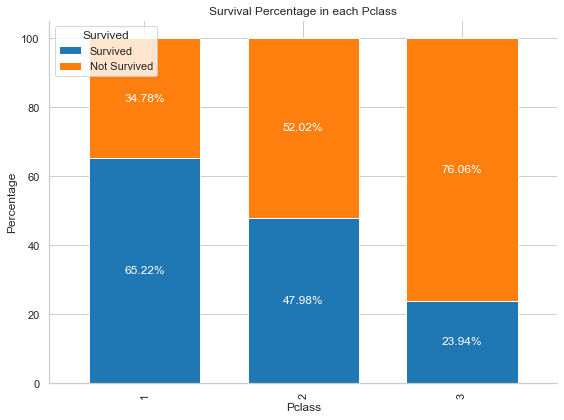

In [18]:
# Calculate the total count of passengers in each 'Pclass'
pclass_counts = df['Pclass'].value_counts()

# Calculate the percentage of passengers who survived in each 'Pclass'
survived_percentage = df[df['Survived'] == 1]['Pclass'].value_counts() / pclass_counts * 100

# Calculate the percentage of passengers who didn't survive in each 'Pclass'
not_survived_percentage = df[df['Survived'] == 0]['Pclass'].value_counts() / pclass_counts * 100

# Create a DataFrame to hold the calculated percentages
percentage_df = pd.DataFrame({'Survived': survived_percentage, 'Not Survived': not_survived_percentage})

# Plot the bar graph with percentages
ax = percentage_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.7, figsize=(8, 6))

# Set the y-axis label to "Percentage"
ax.set_ylabel("Percentage")

# Set the plot title and x-axis label
ax.set_title("Survival Percentage in each Pclass")
ax.set_xlabel("Pclass")

# Calculate the cumulative heights for annotation placement
cumulative_heights = [0] * len(percentage_df.index)
for p in ax.patches:
    percentage = f"{p.get_height():.2f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2 + cumulative_heights[int(x)]
    cumulative_heights[int(x)] += p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=12, color='white')

# Customize legend
ax.legend(title='Survived', title_fontsize=12, loc='upper left')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


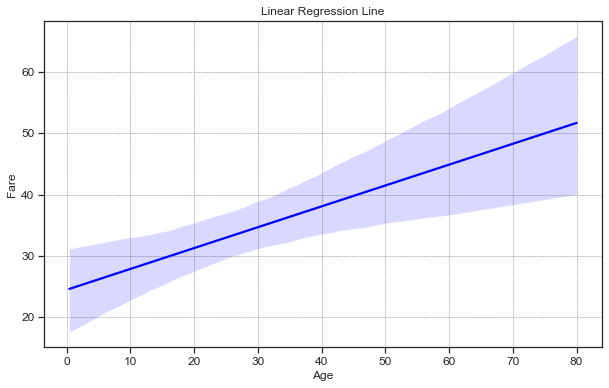

In [19]:

# Set the style for the plot
sns.set(style="ticks")

# Create the regplot with customizations
plt.figure(figsize=(10, 6))
reg_plot = sns.regplot(x="Age", y="Fare", data=df, scatter=False, color="blue")

# Add title and labels to the axes
plt.title("Linear Regression Line")
plt.xlabel("Age")
plt.ylabel("Fare")

# Customize the ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

<AxesSubplot:>

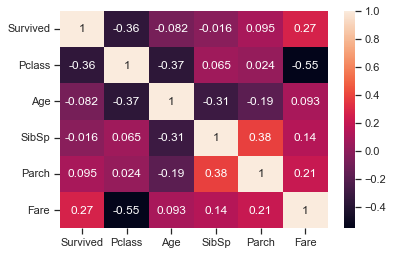

In [20]:
#checking the correlation
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

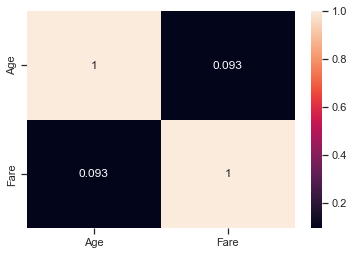

In [21]:
#checking the correlation
sns.heatmap(df[['Age', 'Fare']].corr(),annot=True)

#### label encoding

In [22]:
columns_to_label_encode = ['Survived', 'Pclass', 'Sex' , 'SibSp' , 'Parch' , 'Embarked']
label_encoder = LabelEncoder()
for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
707,0,2,0,39.0,0,5,29.1250,1
708,0,1,1,27.0,0,0,13.0000,2
709,1,0,0,19.0,0,0,30.0000,2
710,1,0,1,26.0,0,0,30.0000,0


In [24]:
df['Survived'].value_counts() ## Dataset is not a balanced one

0    424
1    288
Name: Survived, dtype: int64

### Divide the dataset

In [25]:
X = df.drop('Survived', axis=1) 
y = df['Survived'] 

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
len(X_train)

569

In [28]:
len(X_test)

143

# ML models

### 01) Decision tree model

Specificity: 0.7875
Sensitivity: 0.6031746031746031
Accuracy: 0.7062937062937062


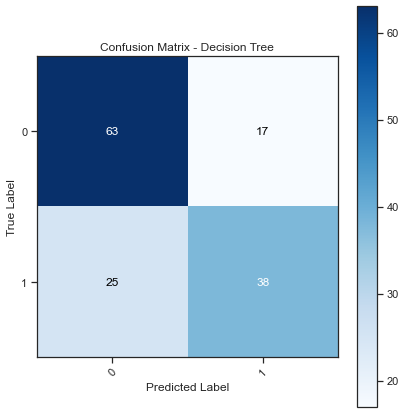

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        80
           1       0.69      0.60      0.64        63

    accuracy                           0.71       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.70      0.71      0.70       143



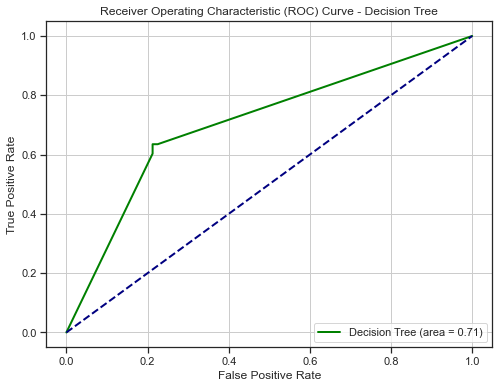

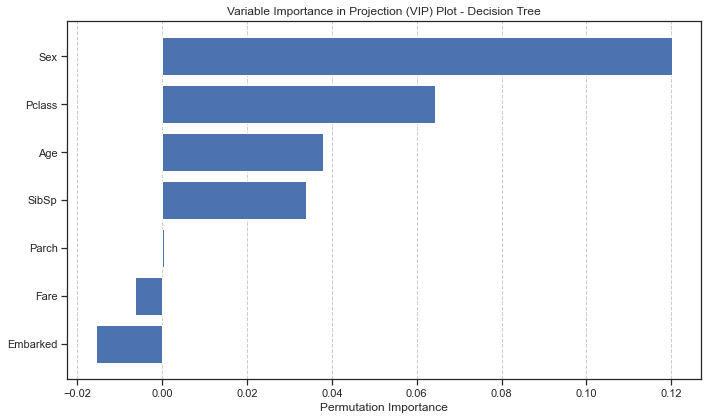

In [29]:
# Create and fit the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set using the Decision Tree model
y_pred_dt = decision_tree_model.predict(X_test)

# Get the confusion matrix for the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_dt[1, 1]
TN = conf_matrix_dt[0, 0]
FP = conf_matrix_dt[0, 1]
FN = conf_matrix_dt[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)


# Plot the confusion matrix for the Decision Tree model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()
tick_marks_dt = np.arange(len(set(y)))
plt.xticks(tick_marks_dt, set(y), rotation=45)
plt.yticks(tick_marks_dt, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_dt[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



# Get the classification report for the Decision Tree model
class_report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(class_report_dt)

# Get the ROC curve and AUC score for the Decision Tree model
y_probs_dt = decision_tree_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = roc_auc_score(y_test, y_probs_dt)

# Plot the ROC curve for the Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Get the VIP (Variable Importance in Projection) plot for the Decision Tree model
perm_importance_dt = permutation_importance(decision_tree_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx_dt = perm_importance_dt.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_dt], perm_importance_dt.importances_mean[sorted_idx_dt])
plt.xlabel("Permutation Importance")
plt.title("Variable Importance in Projection (VIP) Plot - Decision Tree")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

### 02) KNN model

Specificity: 0.6875
Sensitivity: 0.6984126984126984
Accuracy: 0.6923076923076923


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


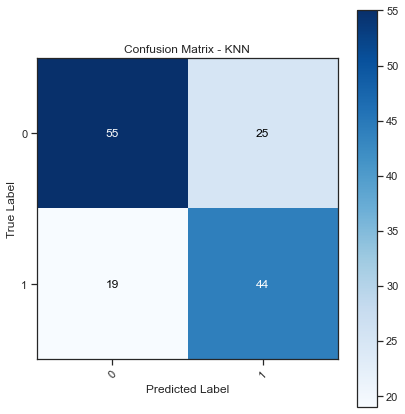

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        80
           1       0.64      0.70      0.67        63

    accuracy                           0.69       143
   macro avg       0.69      0.69      0.69       143
weighted avg       0.70      0.69      0.69       143



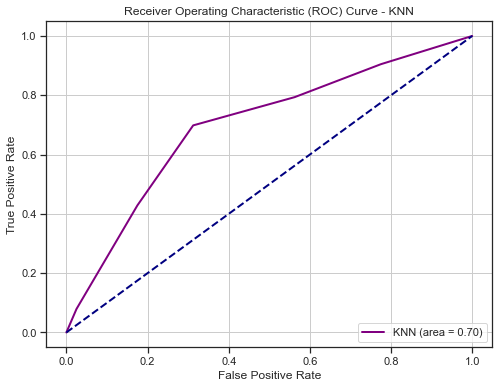

In [30]:
# Create and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set using the KNN model
y_pred_knn = knn_model.predict(X_test)

# Get the confusion matrix for the KNN model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_knn[1, 1]
TN = conf_matrix_knn[0, 0]
FP = conf_matrix_knn[0, 1]
FN = conf_matrix_knn[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)


# Plot the confusion matrix for the KNN model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.colorbar()
tick_marks_knn = np.arange(len(set(y)))
plt.xticks(tick_marks_knn, set(y), rotation=45)
plt.yticks(tick_marks_knn, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_knn[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the KNN model
class_report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:")
print(class_report_knn)

# Get the ROC curve and AUC score for the KNN model
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

# Plot the ROC curve for the KNN model
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 03) SVM model

Specificity: 0.85
Sensitivity: 0.6190476190476191
Accuracy: 0.7482517482517482


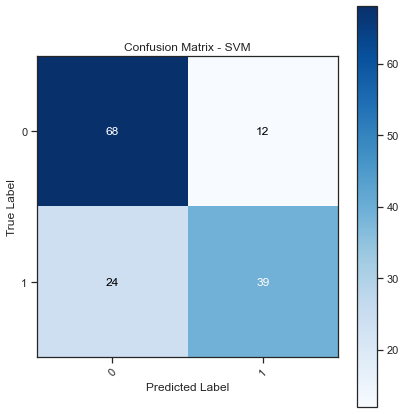

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        80
           1       0.76      0.62      0.68        63

    accuracy                           0.75       143
   macro avg       0.75      0.73      0.74       143
weighted avg       0.75      0.75      0.74       143



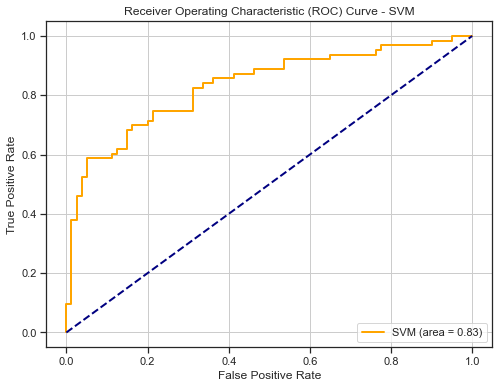

In [31]:
# Create and fit the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Get the confusion matrix for the SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_svm[1, 1]
TN = conf_matrix_svm[0, 0]
FP = conf_matrix_svm[0, 1]
FN = conf_matrix_svm[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the SVM model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.colorbar()
tick_marks_svm = np.arange(len(set(y)))
plt.xticks(tick_marks_svm, set(y), rotation=45)
plt.yticks(tick_marks_svm, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_svm[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the SVM model
class_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(class_report_svm)

# Get the ROC curve and AUC score for the SVM model
y_probs_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
roc_auc_svm = roc_auc_score(y_test, y_probs_svm)

# Plot the ROC curve for the SVM model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 04) Random forest model

Specificity: 0.8375
Sensitivity: 0.7301587301587301
Accuracy: 0.7902097902097902


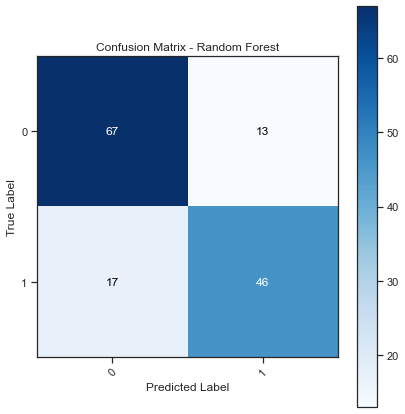

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        80
           1       0.78      0.73      0.75        63

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.79       143
weighted avg       0.79      0.79      0.79       143



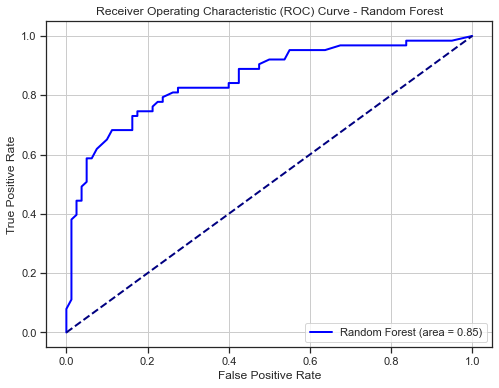

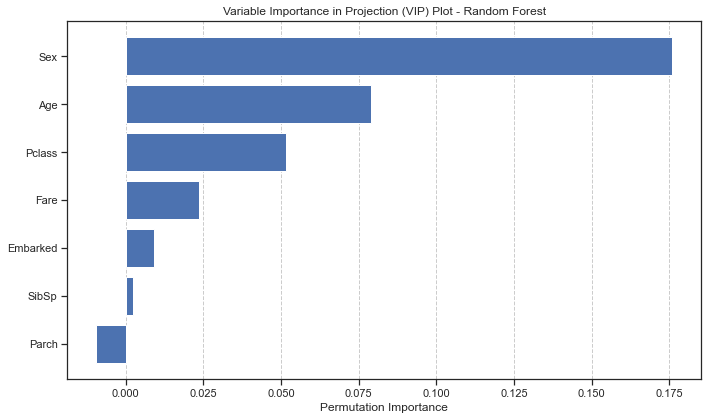

In [32]:
# Create and fit the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set using the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Get the confusion matrix for the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_rf[1, 1]
TN = conf_matrix_rf[0, 0]
FP = conf_matrix_rf[0, 1]
FN = conf_matrix_rf[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the Random Forest model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks_rf = np.arange(len(set(y)))
plt.xticks(tick_marks_rf, set(y), rotation=45)
plt.yticks(tick_marks_rf, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_rf[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the Random Forest model
class_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

# Get the ROC curve and AUC score for the Random Forest model
y_probs_rf = random_forest_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

# Plot the ROC curve for the Random Forest model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Get the VIP (Variable Importance in Projection) plot for the Random Forest model
perm_importance_rf = permutation_importance(random_forest_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx_rf = perm_importance_rf.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_rf], perm_importance_rf.importances_mean[sorted_idx_rf])
plt.xlabel("Permutation Importance")
plt.title("Variable Importance in Projection (VIP) Plot - Random Forest")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

#### The response variable is not a balanced one. As a remedy for that we can use oversampling, under sampling and SMOTE sampling techniques to balanced the dataset

In [33]:
# Apply Random OverSampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### 01) Decision Tree model - oversampling

Specificity: 0.7857142857142857
Sensitivity: 0.8837209302325582
Accuracy: 0.8352941176470589


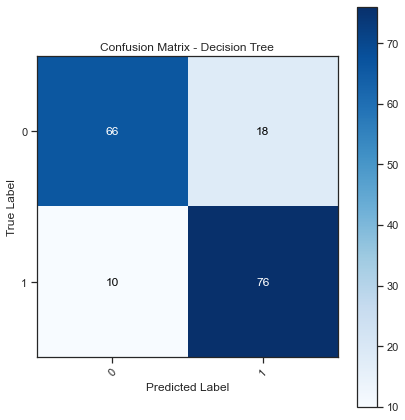

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.82        84
           1       0.81      0.88      0.84        86

    accuracy                           0.84       170
   macro avg       0.84      0.83      0.83       170
weighted avg       0.84      0.84      0.83       170



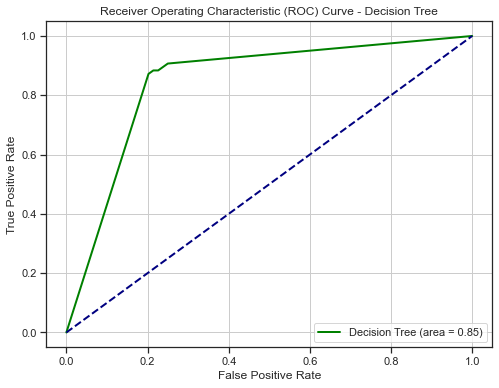

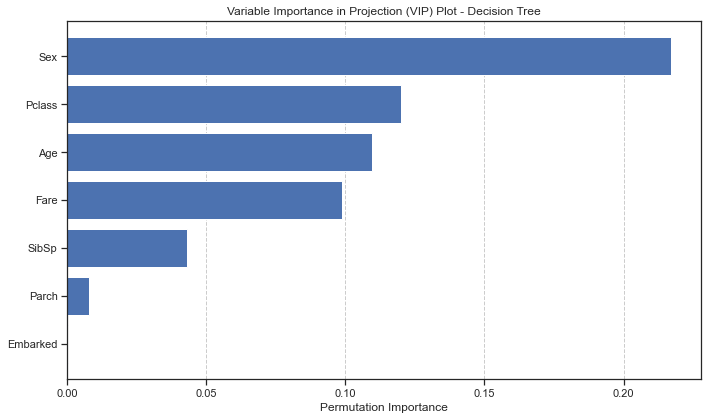

In [34]:
# Create and fit the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set using the Decision Tree model
y_pred_dt = decision_tree_model.predict(X_test)

# Get the confusion matrix for the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_dt[1, 1]
TN = conf_matrix_dt[0, 0]
FP = conf_matrix_dt[0, 1]
FN = conf_matrix_dt[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)


# Plot the confusion matrix for the Decision Tree model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()
tick_marks_dt = np.arange(len(set(y_resampled)))
plt.xticks(tick_marks_dt, set(y_resampled), rotation=45)
plt.yticks(tick_marks_dt, set(y_resampled))
for i in range(len(set(y_resampled))):
    for j in range(len(set(y_resampled))):
        plt.text(j, i, str(conf_matrix_dt[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the Decision Tree model
class_report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(class_report_dt)

# Get the ROC curve and AUC score for the Decision Tree model
y_probs_dt = decision_tree_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = roc_auc_score(y_test, y_probs_dt)

# Plot the ROC curve for the Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Get the VIP (Variable Importance in Projection) plot for the Decision Tree model
perm_importance_dt = permutation_importance(decision_tree_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx_dt = perm_importance_dt.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_dt], perm_importance_dt.importances_mean[sorted_idx_dt])
plt.xlabel("Permutation Importance")
plt.title("Variable Importance in Projection (VIP) Plot - Decision Tree")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


### 02) KNN model - oversampling

Specificity: 0.5833333333333334
Sensitivity: 0.7906976744186046
Accuracy: 0.6882352941176471


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


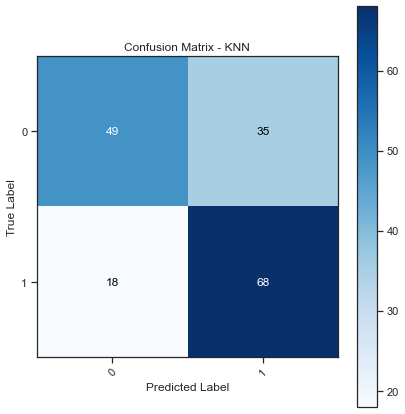

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.58      0.65        84
           1       0.66      0.79      0.72        86

    accuracy                           0.69       170
   macro avg       0.70      0.69      0.68       170
weighted avg       0.70      0.69      0.68       170



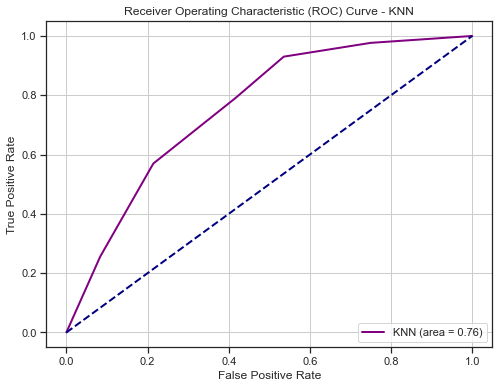

In [35]:
# Create and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set using the KNN model
y_pred_knn = knn_model.predict(X_test)

# Get the confusion matrix for the KNN model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_knn[1, 1]
TN = conf_matrix_knn[0, 0]
FP = conf_matrix_knn[0, 1]
FN = conf_matrix_knn[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the KNN model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.colorbar()
tick_marks_knn = np.arange(len(set(y)))
plt.xticks(tick_marks_knn, set(y), rotation=45)
plt.yticks(tick_marks_knn, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_knn[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the KNN model
class_report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:")
print(class_report_knn)

# Get the ROC curve and AUC score for the KNN model
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

# Plot the ROC curve for the KNN model
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 03) SVM model - oversampling

Specificity: 0.8452380952380952
Sensitivity: 0.7558139534883721
Accuracy: 0.8


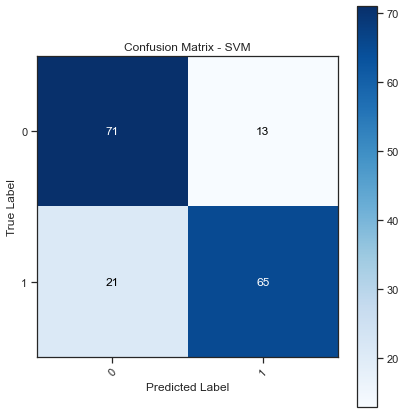

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        84
           1       0.83      0.76      0.79        86

    accuracy                           0.80       170
   macro avg       0.80      0.80      0.80       170
weighted avg       0.80      0.80      0.80       170



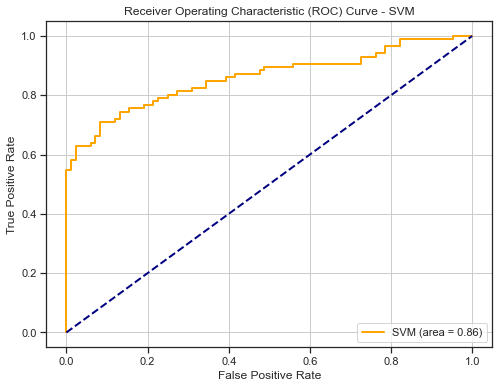

In [36]:
# Create and fit the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Get the confusion matrix for the SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_svm[1, 1]
TN = conf_matrix_svm[0, 0]
FP = conf_matrix_svm[0, 1]
FN = conf_matrix_svm[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the SVM model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.colorbar()
tick_marks_svm = np.arange(len(set(y)))
plt.xticks(tick_marks_svm, set(y), rotation=45)
plt.yticks(tick_marks_svm, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_svm[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the SVM model
class_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(class_report_svm)

# Get the ROC curve and AUC score for the SVM model
y_probs_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
roc_auc_svm = roc_auc_score(y_test, y_probs_svm)

# Plot the ROC curve for the SVM model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 04) Random Forest model - oversampling

Specificity: 0.8095238095238095
Sensitivity: 0.9069767441860465
Accuracy: 0.8588235294117647


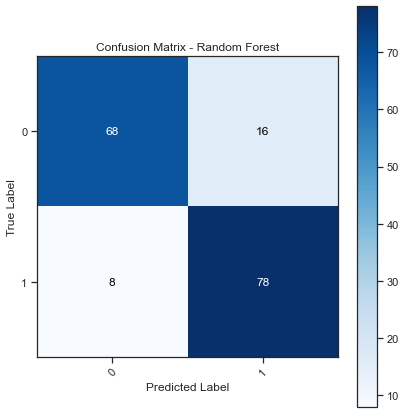

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        84
           1       0.83      0.91      0.87        86

    accuracy                           0.86       170
   macro avg       0.86      0.86      0.86       170
weighted avg       0.86      0.86      0.86       170



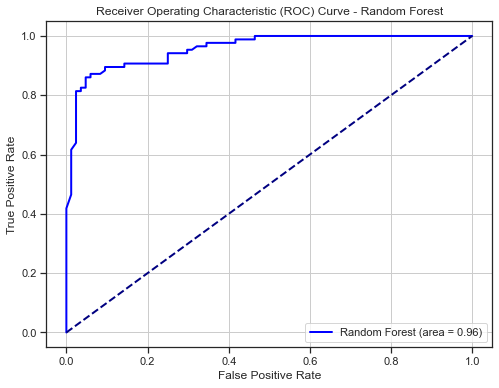

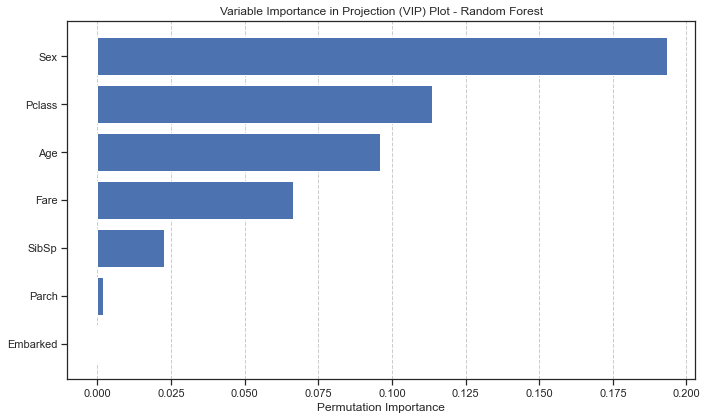

In [37]:
# Create and fit the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set using the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Get the confusion matrix for the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_rf[1, 1]
TN = conf_matrix_rf[0, 0]
FP = conf_matrix_rf[0, 1]
FN = conf_matrix_rf[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the Random Forest model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks_rf = np.arange(len(set(y)))
plt.xticks(tick_marks_rf, set(y), rotation=45)
plt.yticks(tick_marks_rf, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_rf[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the Random Forest model
class_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

# Get the ROC curve and AUC score for the Random Forest model
y_probs_rf = random_forest_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

# Plot the ROC curve for the Random Forest model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Get the VIP (Variable Importance in Projection) plot for the Random Forest model
perm_importance_rf = permutation_importance(random_forest_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx_rf = perm_importance_rf.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_rf], perm_importance_rf.importances_mean[sorted_idx_rf])
plt.xlabel("Permutation Importance")
plt.title("Variable Importance in Projection (VIP) Plot - Random Forest")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

In [38]:
# Apply Random UnderSampling to balance the classes
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### 01) Decision Tree model - undersampling

Specificity: 0.7936507936507936
Sensitivity: 0.6792452830188679
Accuracy: 0.7413793103448276


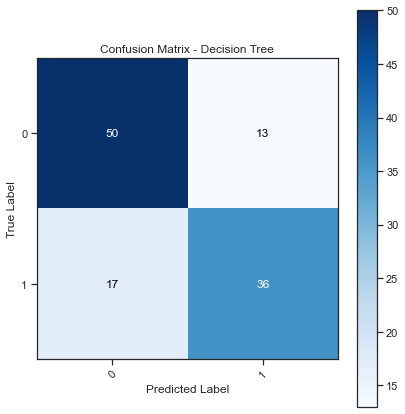

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        63
           1       0.73      0.68      0.71        53

    accuracy                           0.74       116
   macro avg       0.74      0.74      0.74       116
weighted avg       0.74      0.74      0.74       116



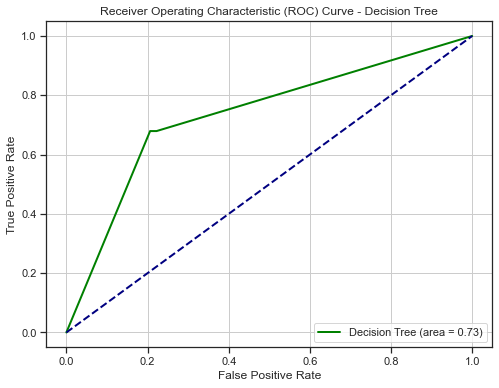

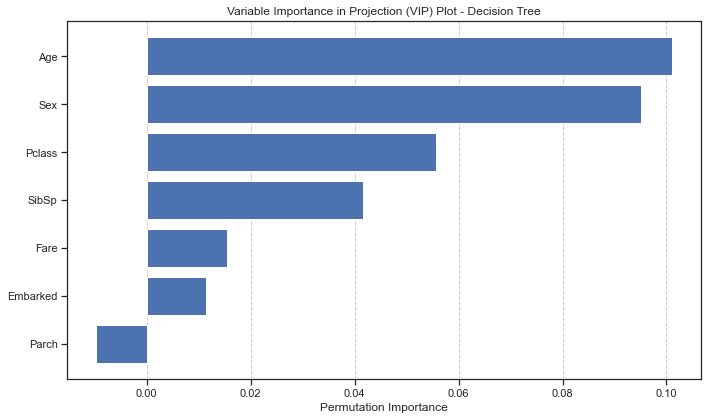

In [39]:
# Create and fit the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set using the Decision Tree model
y_pred_dt = decision_tree_model.predict(X_test)

# Get the confusion matrix for the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_dt[1, 1]
TN = conf_matrix_dt[0, 0]
FP = conf_matrix_dt[0, 1]
FN = conf_matrix_dt[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)


# Plot the confusion matrix for the Decision Tree model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()
tick_marks_dt = np.arange(len(set(y)))
plt.xticks(tick_marks_dt, set(y), rotation=45)
plt.yticks(tick_marks_dt, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_dt[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the Decision Tree model
class_report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(class_report_dt)

# Get the ROC curve and AUC score for the Decision Tree model
y_probs_dt = decision_tree_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = roc_auc_score(y_test, y_probs_dt)

# Plot the ROC curve for the Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Get the VIP (Variable Importance in Projection) plot for the Decision Tree model
perm_importance_dt = permutation_importance(decision_tree_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx_dt = perm_importance_dt.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_dt], perm_importance_dt.importances_mean[sorted_idx_dt])
plt.xlabel("Permutation Importance")
plt.title("Variable Importance in Projection (VIP) Plot - Decision Tree")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

### 02) KNN model - undersampling

Specificity: 0.7301587301587301
Sensitivity: 0.7169811320754716
Accuracy: 0.7241379310344828


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


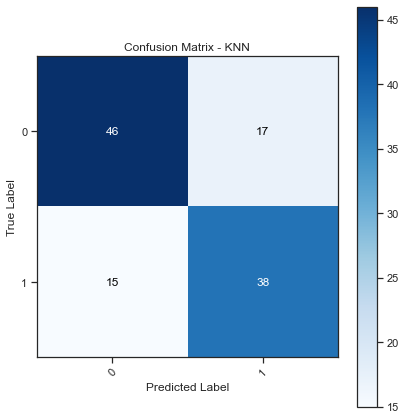

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        63
           1       0.69      0.72      0.70        53

    accuracy                           0.72       116
   macro avg       0.72      0.72      0.72       116
weighted avg       0.73      0.72      0.72       116



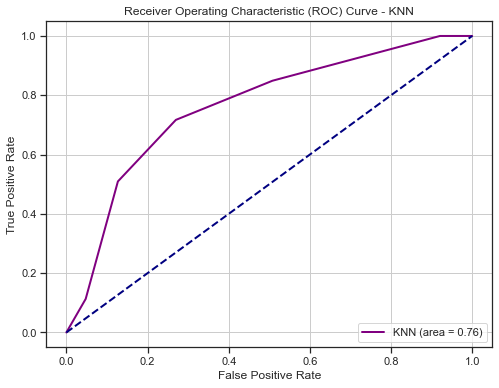

In [40]:
# Create and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set using the KNN model
y_pred_knn = knn_model.predict(X_test)

# Get the confusion matrix for the KNN model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_knn[1, 1]
TN = conf_matrix_knn[0, 0]
FP = conf_matrix_knn[0, 1]
FN = conf_matrix_knn[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the KNN model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.colorbar()
tick_marks_knn = np.arange(len(set(y)))
plt.xticks(tick_marks_knn, set(y), rotation=45)
plt.yticks(tick_marks_knn, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_knn[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the KNN model
class_report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:")
print(class_report_knn)

# Get the ROC curve and AUC score for the KNN model
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

# Plot the ROC curve for the KNN model
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 03) SVM model - undersampling

Specificity: 0.873015873015873
Sensitivity: 0.7169811320754716
Accuracy: 0.8017241379310345


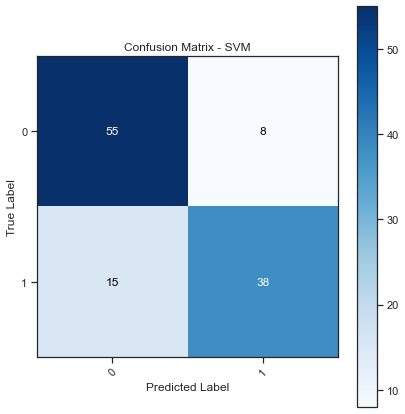

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        63
           1       0.83      0.72      0.77        53

    accuracy                           0.80       116
   macro avg       0.81      0.79      0.80       116
weighted avg       0.80      0.80      0.80       116



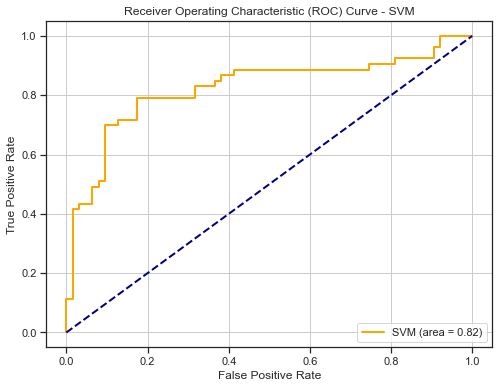

In [41]:
# Create and fit the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Get the confusion matrix for the SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_svm[1, 1]
TN = conf_matrix_svm[0, 0]
FP = conf_matrix_svm[0, 1]
FN = conf_matrix_svm[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the SVM model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.colorbar()
tick_marks_svm = np.arange(len(set(y)))
plt.xticks(tick_marks_svm, set(y), rotation=45)
plt.yticks(tick_marks_svm, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_svm[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the SVM model
class_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(class_report_svm)

# Get the ROC curve and AUC score for the SVM model
y_probs_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
roc_auc_svm = roc_auc_score(y_test, y_probs_svm)

# Plot the ROC curve for the SVM model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 04) Random forest model - undersampling

Specificity: 0.8571428571428571
Sensitivity: 0.6981132075471698
Accuracy: 0.7844827586206896


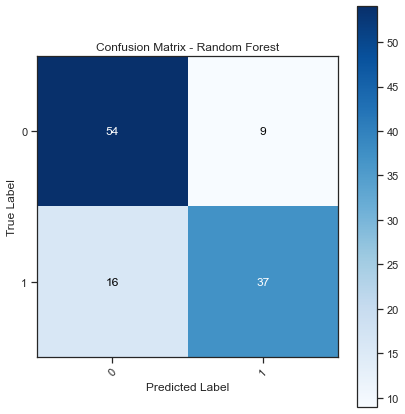

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        63
           1       0.80      0.70      0.75        53

    accuracy                           0.78       116
   macro avg       0.79      0.78      0.78       116
weighted avg       0.79      0.78      0.78       116



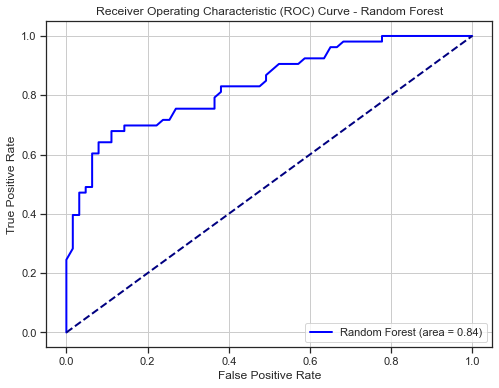

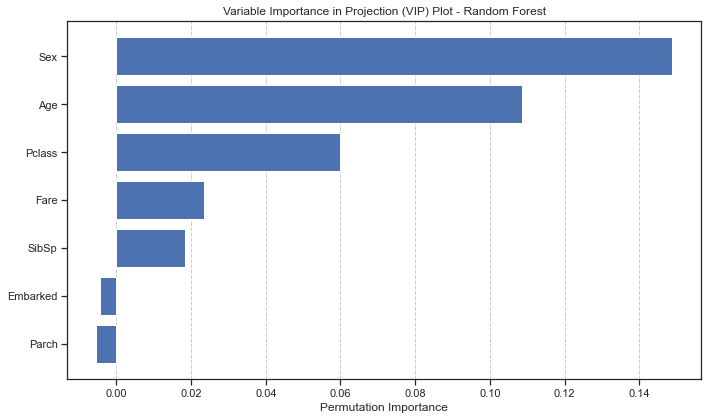

In [42]:
# Create and fit the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set using the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Get the confusion matrix for the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_rf[1, 1]
TN = conf_matrix_rf[0, 0]
FP = conf_matrix_rf[0, 1]
FN = conf_matrix_rf[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the Random Forest model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks_rf = np.arange(len(set(y)))
plt.xticks(tick_marks_rf, set(y), rotation=45)
plt.yticks(tick_marks_rf, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_rf[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the Random Forest model
class_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

# Get the ROC curve and AUC score for the Random Forest model
y_probs_rf = random_forest_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

# Plot the ROC curve for the Random Forest model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Get the VIP (Variable Importance in Projection) plot for the Random Forest model
perm_importance_rf = permutation_importance(random_forest_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx_rf = perm_importance_rf.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_rf], perm_importance_rf.importances_mean[sorted_idx_rf])
plt.xlabel("Permutation Importance")
plt.title("Variable Importance in Projection (VIP) Plot - Random Forest")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

In [43]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### 01) Decision Tree model - SMOTE sampling

Specificity: 0.8571428571428571
Sensitivity: 0.7209302325581395
Accuracy: 0.788235294117647


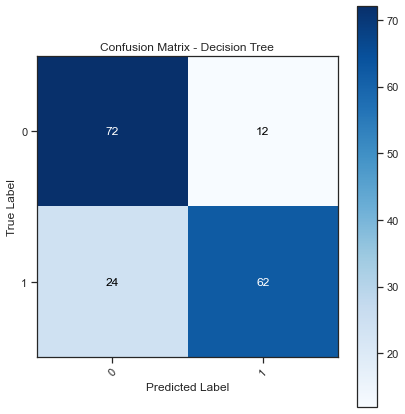

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        84
           1       0.84      0.72      0.77        86

    accuracy                           0.79       170
   macro avg       0.79      0.79      0.79       170
weighted avg       0.79      0.79      0.79       170



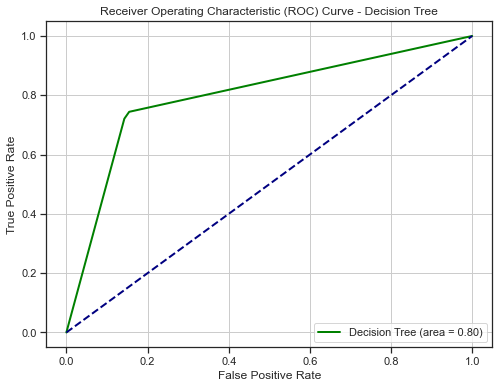

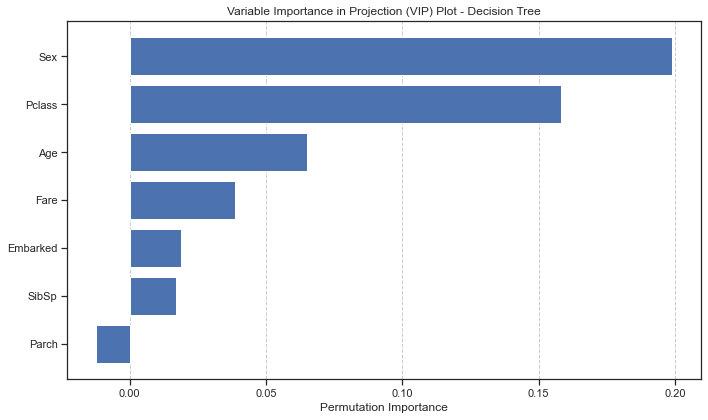

In [44]:
# Create and fit the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set using the Decision Tree model
y_pred_dt = decision_tree_model.predict(X_test)

# Get the confusion matrix for the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_dt[1, 1]
TN = conf_matrix_dt[0, 0]
FP = conf_matrix_dt[0, 1]
FN = conf_matrix_dt[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the Decision Tree model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()
tick_marks_dt = np.arange(len(set(y)))
plt.xticks(tick_marks_dt, set(y), rotation=45)
plt.yticks(tick_marks_dt, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_dt[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the Decision Tree model
class_report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(class_report_dt)

# Get the ROC curve and AUC score for the Decision Tree model
y_probs_dt = decision_tree_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = roc_auc_score(y_test, y_probs_dt)

# Plot the ROC curve for the Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Get the VIP (Variable Importance in Projection) plot for the Decision Tree model
perm_importance_dt = permutation_importance(decision_tree_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx_dt = perm_importance_dt.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_dt], perm_importance_dt.importances_mean[sorted_idx_dt])
plt.xlabel("Permutation Importance")
plt.title("Variable Importance in Projection (VIP) Plot - Decision Tree")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

### 02) KNN model - SMOTE sampling

Specificity: 0.6190476190476191
Sensitivity: 0.7093023255813954
Accuracy: 0.6647058823529411


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


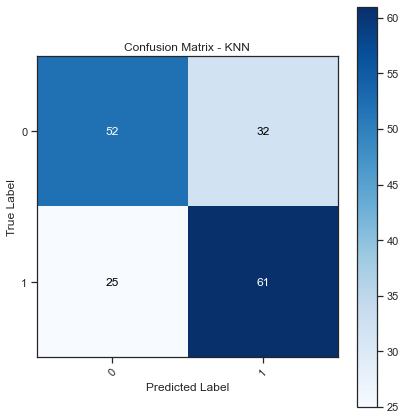

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        84
           1       0.66      0.71      0.68        86

    accuracy                           0.66       170
   macro avg       0.67      0.66      0.66       170
weighted avg       0.67      0.66      0.66       170



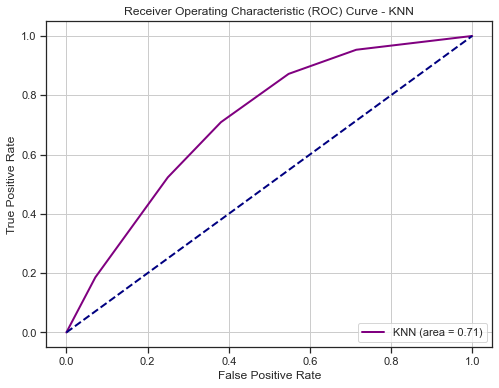

In [45]:
# Create and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set using the KNN model
y_pred_knn = knn_model.predict(X_test)

# Get the confusion matrix for the KNN model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_knn[1, 1]
TN = conf_matrix_knn[0, 0]
FP = conf_matrix_knn[0, 1]
FN = conf_matrix_knn[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the KNN model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.colorbar()
tick_marks_knn = np.arange(len(set(y)))
plt.xticks(tick_marks_knn, set(y), rotation=45)
plt.yticks(tick_marks_knn, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_knn[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the KNN model
class_report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:")
print(class_report_knn)

# Get the ROC curve and AUC score for the KNN model
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

# Plot the ROC curve for the KNN model
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 03) SVM model - SMOTE sampling

Specificity: 0.8452380952380952
Sensitivity: 0.7790697674418605
Accuracy: 0.8117647058823529


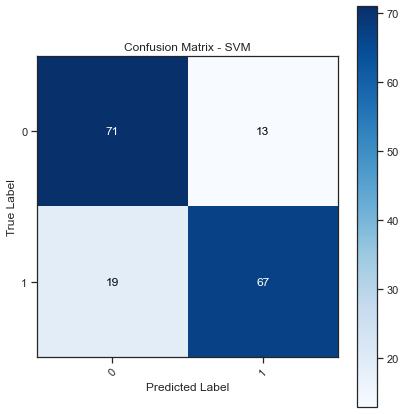

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        84
           1       0.84      0.78      0.81        86

    accuracy                           0.81       170
   macro avg       0.81      0.81      0.81       170
weighted avg       0.81      0.81      0.81       170



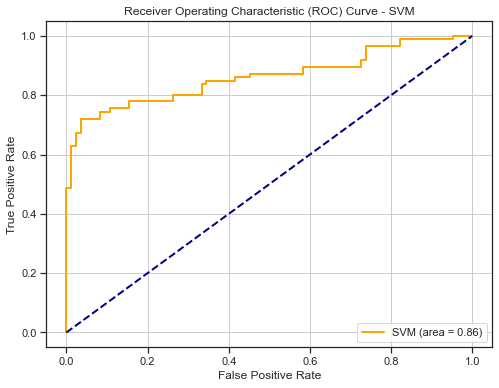

In [46]:
# Create and fit the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Get the confusion matrix for the SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_svm[1, 1]
TN = conf_matrix_svm[0, 0]
FP = conf_matrix_svm[0, 1]
FN = conf_matrix_svm[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the SVM model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.colorbar()
tick_marks_svm = np.arange(len(set(y)))
plt.xticks(tick_marks_svm, set(y), rotation=45)
plt.yticks(tick_marks_svm, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_svm[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the SVM model
class_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(class_report_svm)

# Get the ROC curve and AUC score for the SVM model
y_probs_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
roc_auc_svm = roc_auc_score(y_test, y_probs_svm)

# Plot the ROC curve for the SVM model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 04) Random forest model - SMOTE sampling

Specificity: 0.8095238095238095
Sensitivity: 0.8255813953488372
Accuracy: 0.8176470588235294


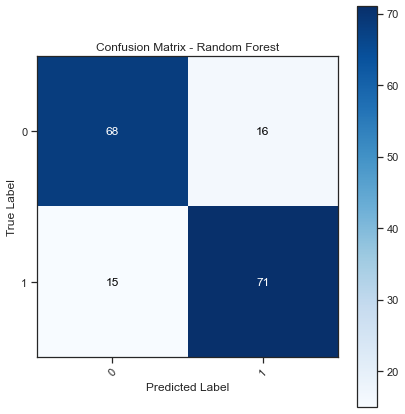

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        84
           1       0.82      0.83      0.82        86

    accuracy                           0.82       170
   macro avg       0.82      0.82      0.82       170
weighted avg       0.82      0.82      0.82       170



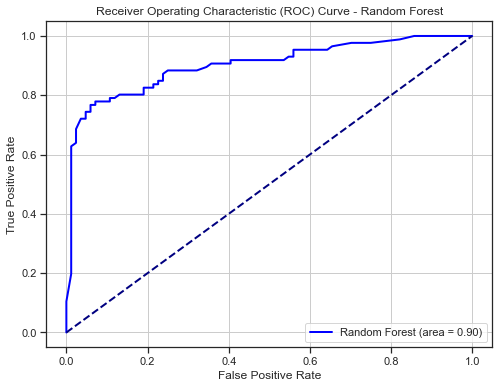

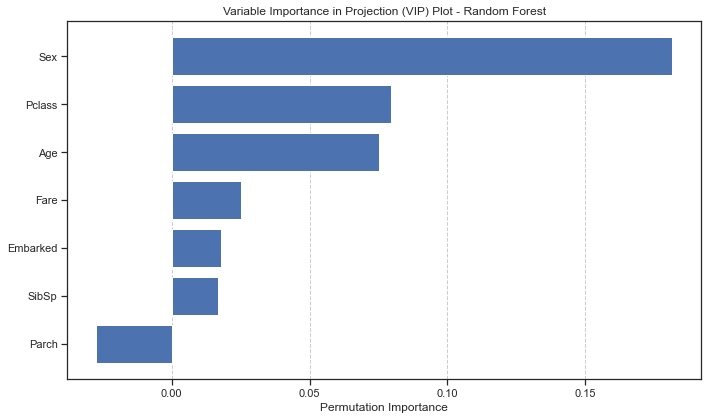

In [47]:
# Create and fit the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set using the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Get the confusion matrix for the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix_rf[1, 1]
TN = conf_matrix_rf[0, 0]
FP = conf_matrix_rf[0, 1]
FN = conf_matrix_rf[1, 0]

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)

# Plot the confusion matrix for the Random Forest model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks_rf = np.arange(len(set(y)))
plt.xticks(tick_marks_rf, set(y), rotation=45)
plt.yticks(tick_marks_rf, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_rf[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the Random Forest model
class_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

# Get the ROC curve and AUC score for the Random Forest model
y_probs_rf = random_forest_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

# Plot the ROC curve for the Random Forest model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Get the VIP (Variable Importance in Projection) plot for the Random Forest model
perm_importance_rf = permutation_importance(random_forest_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx_rf = perm_importance_rf.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_rf], perm_importance_rf.importances_mean[sorted_idx_rf])
plt.xlabel("Permutation Importance")
plt.title("Variable Importance in Projection (VIP) Plot - Random Forest")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()